# 6.1 Stability book

In [2]:
import pandas as pd
from mms185 import simpson
import matplotlib.pyplot as plt
import numpy as np
from numpy import arctan,tan, sin, cos
from sympy import symbols, Eq
import sympy as sp
import pandas as pd
from scipy.integrate import simpson, cumulative_trapezoid

In [3]:
GZ,MS,GM,phi = symbols("GZ,MS,GM,phi")

### 1. The GZ-curve for 0 to 75 deg of heel.

Residual resistance $MS$ curve,

In [4]:
eq_MS = Eq(GZ,MS+GM*sp.sin(phi))
eq_MS

Eq(GZ, GM*sin(phi) + MS)

In [5]:
lambda_MS = sp.lambdify(list(eq_MS.rhs.free_symbols),eq_MS.rhs)

In [6]:
df_winter_moon = pd.read_csv("MS_Winter_Moon.csv")
df_winter_moon['phi [deg]'] = np.round(np.rad2deg(df_winter_moon['phi']),0)
df_winter_moon.set_index('phi [deg]', inplace=True)

In [7]:
df_winter_moon

,phi,MS
phi [deg],,
0.0,0.000,0.0000
6.0,0.105,0.0040
12.0,0.209,0.0280
20.0,0.349,0.1400
25.0,0.436,0.2725
30.0,0.524,0.4050
40.0,0.698,0.5680
50.0,0.873,0.4380
75.0,1.309,-0.4200


In [8]:
meta_data = {
    "GM" : 0.2,      # Meta center [m]
    "Delta": 22723,  # Displacement [t]
}

In [9]:
df_winter_moon["GZ"] = lambda_MS(GM=meta_data["GM"], MS=df_winter_moon["MS"], phi=df_winter_moon["phi"])

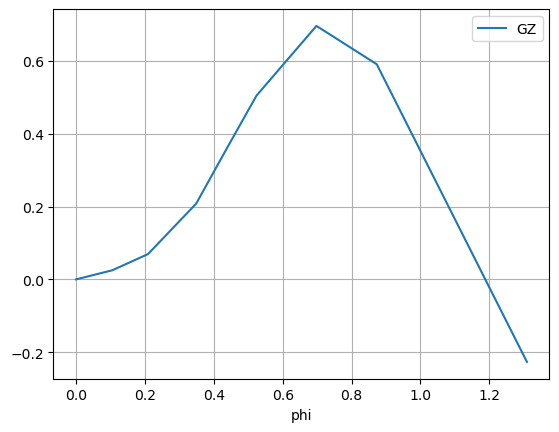

In [10]:
fig,ax=plt.subplots()
df_winter_moon.plot(x="phi", y="GZ", ax=ax)
ax.grid(True)

### 2. The curve of righting moment for 0 to 75 deg of heel.

In [11]:
M,mass = symbols(r"M,\Delta")
eq_M = Eq(M,GZ*mass)
eq_M

Eq(M, GZ*\Delta)

In [12]:
expression = eq_M.rhs.subs(mass,"Delta")
lambda_M = sp.lambdify(list(expression.free_symbols),expression)

In [13]:
df_winter_moon["M"] = lambda_M(Delta=meta_data["Delta"], GZ=df_winter_moon["GZ"])

In [14]:
df_winter_moon

,phi,MS,GZ,M
phi [deg],,,,
0.0,0.000,0.0000,0.000000,0.000000
6.0,0.105,0.0040,0.024961,567.198659
12.0,0.209,0.0280,0.069496,1579.165629
20.0,0.349,0.1400,0.208392,4735.283524
25.0,0.436,0.2725,0.356963,8111.279613
30.0,0.524,0.4050,0.505069,11476.693932
40.0,0.698,0.5680,0.696537,15827.418047
50.0,0.873,0.4380,0.591252,13435.019079
75.0,1.309,-0.4200,-0.226815,-5153.909889


### 3. The curve of dynamic lever for 0 to 75 deg of heel.
The dynamic lever $e$ is expressed as the area under the $GZ$ curve:

In [15]:

e = symbols("e")
eq_e = Eq(e, sp.Integral(GZ,(phi,0,phi)))
eq_e

Eq(e, Integral(GZ, (phi, 0, phi)))

In [16]:
df_winter_moon['e'] = np.concatenate(([0],cumulative_trapezoid(y=df_winter_moon['GZ'],x=df_winter_moon['phi'])))

In [17]:
df_winter_moon

,phi,MS,GZ,M,e
phi [deg],,,,,
0.0,0.000,0.0000,0.000000,0.000000,0.000000
6.0,0.105,0.0040,0.024961,567.198659,0.001310
12.0,0.209,0.0280,0.069496,1579.165629,0.006222
20.0,0.349,0.1400,0.208392,4735.283524,0.025674
25.0,0.436,0.2725,0.356963,8111.279613,0.050267
30.0,0.524,0.4050,0.505069,11476.693932,0.088197
40.0,0.698,0.5680,0.696537,15827.418047,0.192737
50.0,0.873,0.4380,0.591252,13435.019079,0.305418
75.0,1.309,-0.4200,-0.226815,-5153.909889,0.384866


### The work required to heel the ship over to 25 deg. 

In [18]:
W = symbols("W")
eq_W = Eq(W,mass*e)
eq_W

Eq(W, \Delta*e)

In [19]:
df_winter_moon['W'] = meta_data['Delta']*df_winter_moon['e']

In [20]:
df_winter_moon

,phi,MS,GZ,M,e,W
phi [deg],,,,,,
0.0,0.000,0.0000,0.000000,0.000000,0.000000,0.000000
6.0,0.105,0.0040,0.024961,567.198659,0.001310,29.777930
12.0,0.209,0.0280,0.069496,1579.165629,0.006222,141.388873
20.0,0.349,0.1400,0.208392,4735.283524,0.025674,583.400313
25.0,0.436,0.2725,0.356963,8111.279613,0.050267,1142.225810
30.0,0.524,0.4050,0.505069,11476.693932,0.088197,2004.096646
40.0,0.698,0.5680,0.696537,15827.418047,0.192737,4379.554388
50.0,0.873,0.4380,0.591252,13435.019079,0.305418,6940.017636
75.0,1.309,-0.4200,-0.226815,-5153.909889,0.384866,8745.299440


In [21]:
(df_winter_moon.loc[30]['MS'] - df_winter_moon.loc[20]['MS'])/10*5 + df_winter_moon.loc[20]['MS']

0.2725